# NOTE TO FUTURE SELF
# REDUCE FILE SIZE TO <100KB
# OR WASTE HOURS OF LIFE COMPUTING PRINCIPAL COMPONENTS!!!

In [30]:
import numpy as np
from PIL import Image
#Use your own finish_im or import this one
#from mth433 import finish_im
from matplotlib import pyplot as plt

In [31]:
image = Image.open('random.jpg')

In [47]:
def image_channel_svd(im, channel):
    
    imarr = np.array(im)
    
    if (channel>=0 and channel<=2):
        color_ch = imarr[:,:,channel]
        U, S, Vh = np.linalg.svd(color_ch)
        return U, S, Vh
    else:
        print("no valid channel")
        return 0

In [46]:
def calc_variance(S, k):
    ssv = S**2
    var_data = []
    total_var = np.sum(ssv)
    cum_sum = np.cumsum(ssv[:k])
    return (cum_sum / total_var) * 100
    

In [42]:
a = np.eye(5)
print(a[1:])

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [51]:
def percent_variance(im, upper_rank):
    """Creates a plot of rank vs. percentage variance.
    On the x-axis are the integers k = 1,2,...,upper_rank.
    On the y-axis are three plots of the percentage variance
    captured by the first k singular values of each of the red, green and blue channels.
    These should be appropriately colored as red, green and blue.
    
    Parameters
    ----------
    im : PIL Image
    upper_rank : int
    
    Returns
    -------
    None
    
    """
    _, S_red, _ = image_channel_svd(im, 0)
    _, S_green, _ = image_channel_svd(im, 1)
    _, S_blue, _ = image_channel_svd(im, 2)
    
    x = np.array(range(1, upper_rank+1))
    y_red = calc_variance(S_red, upper_rank)
    y_green = calc_variance(S_green, upper_rank)
    y_blue = calc_variance(S_blue, upper_rank)
    
    plt.plot(x, y_red, color='r')
    plt.plot(x, y_green, color='g')
    plt.plot(x, y_blue, color='b')    

In [52]:
_, S_red, _ = image_channel_svd(image, 0)
_, S_green, _ = image_channel_svd(image, 1)
_, S_blue, _ = image_channel_svd(image, 2)
print(S_red)
print(S_green)
print(S_blue)

[4.00001004e+04 6.30821309e+03 5.63029243e+03 4.30160104e+03
 3.67983309e+03 3.26607573e+03 3.14545904e+03 2.52581013e+03
 2.27704224e+03 2.11212754e+03 2.09194436e+03 1.86472532e+03
 1.80795650e+03 1.68690512e+03 1.64863742e+03 1.44473956e+03
 1.35615033e+03 1.25133328e+03 1.11519151e+03 1.02310893e+03
 1.00077631e+03 9.88346242e+02 9.29093833e+02 9.02582755e+02
 8.56510126e+02 8.35658717e+02 8.02697141e+02 7.51706043e+02
 7.30457145e+02 7.17686311e+02 6.88107794e+02 6.70471815e+02
 6.38932648e+02 6.11480896e+02 5.74356305e+02 5.65829597e+02
 5.60720669e+02 5.46859167e+02 5.19840139e+02 5.13708548e+02
 5.02569143e+02 4.80964404e+02 4.63296220e+02 4.57642498e+02
 4.51667373e+02 4.43853510e+02 4.31193747e+02 4.18081750e+02
 4.07203852e+02 3.99732715e+02 3.88755954e+02 3.78540410e+02
 3.71760847e+02 3.62121413e+02 3.59131285e+02 3.48332283e+02
 3.45150633e+02 3.42754129e+02 3.24474999e+02 3.21077055e+02
 3.16564917e+02 3.05022049e+02 3.00469126e+02 2.93394811e+02
 2.91581183e+02 2.829936

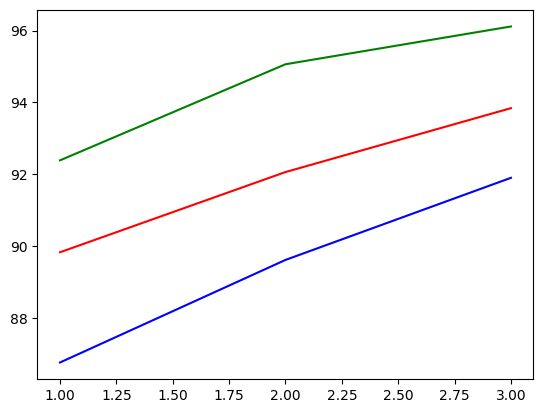

In [53]:
percent_variance(image, 3)

In [ ]:
def im_approx(im, k):
    """Returns the best rank k approximation of an image using
       the svd.  
       
       More specifically, k is a list of 3 integers and im_approx returns
       the best k[0],k[1],k[2] approximations of the red,green,blue
       channels.
    
    Parameters
    ----------
    im : PIL Image 
    k : list of 3 integers (e.g. [25,19,100]). 
    
    Returns
    -------
    PIL Image 
    """
    imarr = np.array(im)
    
    _, S_red, _ = image_channel_svd(im, 0)
    _, S_green, _ = image_channel_svd(im, 1)
    _, S_blue, _ = image_channel_svd(im, 2)
    
    k_approx = []
    
    for i in range(1, k+1):
       if (S_red[i] >= S_green[i]):
          if (S_red[])
    

In [ ]:
def im_reducer(im,percent):
    """Returns the best rank k approximation of an image where k/rank(im) = percent.  
    Calls the function im_approx
    
    Parameters
    ----------
    im : PIL Image
    percent : list of 3 float values in the range [0,1] 
    
    Returns
    -------
    PIL Image
    
    """